C:\Users\ksh95\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


  국가별(1)         항목   2024.01  2024.02   2024.03   2024.04   2024.05   2024.06
0     중국  수출금액 (천불)  10698087  9644443  10521190  10473519  11378378  10694875
1    NaN  수입금액 (천불)  12392520  9411593  11399322  12418793  12286000  10936569
2    NaN  무역수지 (천불)  -1694433   232850   -878132  -1945274   -907622   -241695
3     미국  수출금액 (천불)  10243628  9805064  10890627  11410154  10930798  11019784
4    NaN  수입금액 (천불)   6134690  5600372   5974676   6011401   6368678   5494894
  국가별(1)         항목       연월        금액
0     중국  수출금액 (천불)  2024.01  10698087
1    NaN  수입금액 (천불)  2024.01  12392520
2    NaN  무역수지 (천불)  2024.01  -1694433
3     미국  수출금액 (천불)  2024.01  10243628
4    NaN  수입금액 (천불)  2024.01   6134690
        연월         항목                                             국가별(1)  \
0  2024.01  무역수지 (천불)                                                  0   
1  2024.01  수입금액 (천불)                                                  0   
2  2024.01  수출금액 (천불)  중국미국일본홍콩베트남대만싱가포르인도독일멕시코인도네시아호주필리핀말레이시아러시

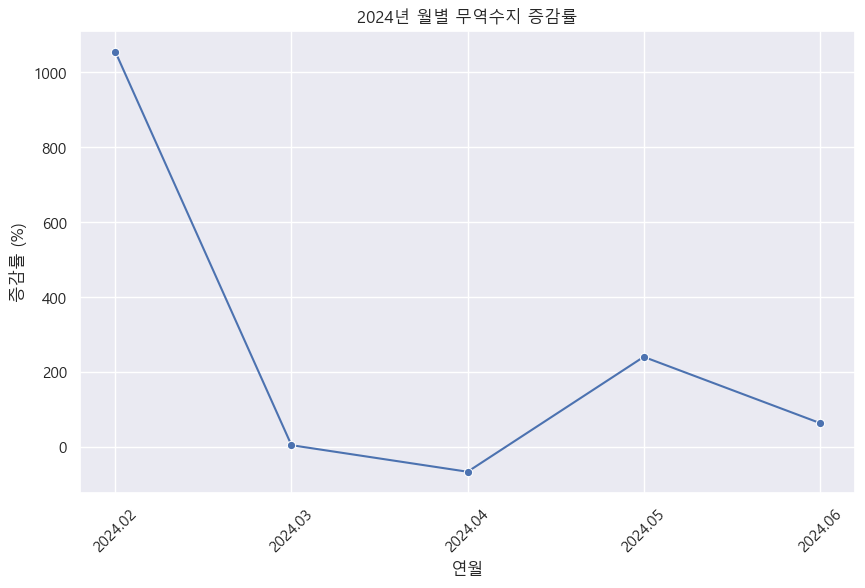

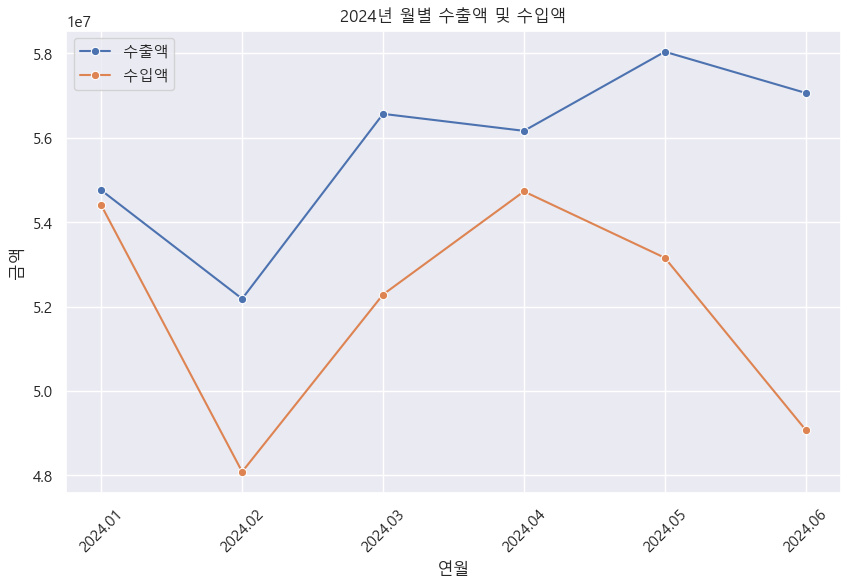

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 폰트 설정
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

# 엑셀 파일 읽어오기
df_raw = pd.read_excel("국가별_수출입현황_20240821130246.xlsx")

# 데이터 확인
print(df_raw.head())

# 필요한 컬럼 선택 및 데이터 전처리
df = df_raw.melt(id_vars=['국가별(1)', '항목'], var_name='연월', value_name='금액')
print(df.head())

# '수출액'과 '수입액'으로 데이터 분리
df_grouped = df.groupby(['연월', '항목'], as_index=False).sum()
print(df_grouped.head())

# 피벗 테이블 생성
df_pivot = df_grouped.pivot_table(index='연월', columns='항목', values='금액', aggfunc='sum').reset_index()
print(df_pivot.head())

# 무역수지 계산 (항목 이름을 정확하게 지정)
df_pivot['무역수지'] = df_pivot['수출금액 (천불)'] - df_pivot['수입금액 (천불)']

# 무역수지 증감률 계산
df_pivot['무역수지 증감률'] = df_pivot['무역수지'].pct_change() * 100

# 결과 확인
print(df_pivot.head())

# 시각화 - 무역수지 증감률
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pivot, x='연월', y='무역수지 증감률', marker='o')
plt.title('2024년 월별 무역수지 증감률')
plt.ylabel('증감률 (%)')
plt.xlabel('연월')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 시각화 - 수출액, 수입액 비교
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pivot, x='연월', y='수출금액 (천불)', marker='o', label='수출액')
sns.lineplot(data=df_pivot, x='연월', y='수입금액 (천불)', marker='o', label='수입액')
plt.title('2024년 월별 수출액 및 수입액')
plt.ylabel('금액')
plt.xlabel('연월')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#2024년 월별로 수출액, 수입액, 및 무역수지의 변화를 분석하는 것입니다.